# Домашнее задание 01-07


In [ ]:
columns='age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')
df = pd.read_csv('data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элеметнов датасета

In [77]:
import pandas as pd
import numpy as np

columns='age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

last10Rows = df.tail(10)
print(last10Rows)

       age      workclass  fnlwgt      education  education-num  \
32551   32        Private   34066           10th              6   
32552   43        Private   84661      Assoc-voc             11   
32553   32        Private  116138        Masters             14   
32554   53        Private  321865        Masters             14   
32555   22        Private  310152   Some-college             10   
32556   27        Private  257302     Assoc-acdm             12   
32557   40        Private  154374        HS-grad              9   
32558   58        Private  151910        HS-grad              9   
32559   22        Private  201490        HS-grad              9   
32560   52   Self-emp-inc  287927        HS-grad              9   

            marital-status          occupation    relationship  \
32551   Married-civ-spouse   Handlers-cleaners         Husband   
32552   Married-civ-spouse               Sales         Husband   
32553        Never-married        Tech-support   Not-in-family  

2) Сколько колонок и сколько строк в этом датасете?

In [78]:
numRows, numCols = df.shape

print('строк', numRows)
print('колонок', numCols)

строк 32561
колонок 15


3) Какие типы данных у элементов этого датасета?

In [79]:
types = df.dtypes
print('элементы и их типы:')
print(types)

элементы и их типы:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [80]:
import numpy as np

columns='age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values="?", names=columns)

# долго не мог понять в чём проблема (не показывались пропуски) - нужно было удалить все пробелы...
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.replace("?", np.nan, inplace=True)

vals = df.isnull().sum()
missCols = vals[vals > 0]

print('Признаки, имеющие пропуски:')
print(missCols)

<ipython-input-80-7c8d49eacf36>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Признаки, имеющие пропуски:
workclass         1836
occupation        1843
native-country     583
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:
native-country - возможно люди из данного датасета не указывали родную страну при переезде в США

occupation - указан другой род занятий, не выходящий в справочник, или также не указан человеком как native-country

workclass - способ занятости может быть пустым, если человек является и одновременно зарегистрированным самозанятым, и например входит в состав муниципального самоуправления

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
uniqueWorkClass = df['workclass'].unique()
uniqueWorkClassCount = len(uniqueWorkClass)

print('Рабочие классы:',uniqueWorkClass)
print('Кол-во классов:',uniqueWorkClassCount)

Рабочие классы: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Кол-во классов: 9


7) Какой средний возраст женщин и мужчин?

In [ ]:
avrFemale = df[df['sex'] == 'Female']['age'].mean()
avrMale = df[df['sex'] == 'Male']['age'].mean()

print('Ср возраст женщин:',avrFemale)
print('Ср возраст мужчин:',avrMale)

Ср возраст женщин: 36.85823043357163
Ср возраст мужчин: 39.43354749885268


8) Постройте гистограмму(bar) распределения образования людей (education)

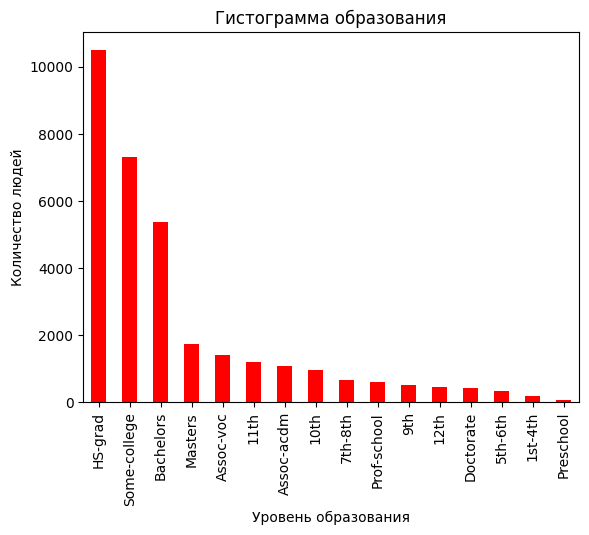

In [ ]:
import matplotlib.pyplot as plt

eduCount = df['education'].value_counts()
eduCount.plot(kind='bar', color='red')

plt.title('Гистограмма образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')

plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [ ]:
ageSalaries = df.groupby('income')['age'].agg(['mean', 'std'])
print(ageSalaries)

             mean        std
income                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
highEdu = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
hightIncome = df[df['income'] == '>50K']

hightIncAndEdu = all(hightIncome['education'].isin(highEdu))
if hightIncAndEdu:
    print("Правда")
else:
    print("Ложь")

Ложь


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
menDf = df[df['sex'] == 'Male']
menDf['isMarried'] = menDf['marital-status'].str.startswith('Married')
incomes = menDf.groupby('isMarried')['income'].value_counts(normalize=True)

marriedInc = incomes.loc[True, '>50K'] if True in incomes.index else -1
singleInc = incomes.loc[False, '>50K'] if False in incomes.index else -1

if marriedInc > singleInc:
    print("Среди женатых")
else:
    print("Среди холостых")

Среди женатых


<ipython-input-14-41c3bbe48867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menDf['isMarried'] = menDf['marital-status'].str.startswith('Married')


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [ ]:
avrgHoursInc = df.groupby(['native-country', 'income'])['hours-per-week'].mean()
print(avrgHoursInc)

native-country  income
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                >50K      45.641026
China           <=50K     37.381818
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 80, dtype: float64


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [81]:
df['capital-passive'] = np.round(np.log1p(df['capital-gain'] - df['capital-loss']))

intervals = np.linspace(df['capital-passive'].min(), df['capital-passive'].max(), 11)
labels = [i for i in range(1, 11)]
df['category'] = pd.cut(df['capital-passive'], bins=intervals, labels=labels, include_lowest=True)

res = pd.pivot_table(df, index='education', columns='category', aggfunc='size', fill_value=0)

print(res)

category         1  2  3  4   5   6    7    8    9  10
education                                             
10th           865  0  0  0   2   5   23    5    3   2
11th          1089  0  0  0   5   6   21   17    4   0
12th           403  0  0  0   3   3    8    5    3   0
1st-4th        159  0  0  0   0   0    4    1    0   0
5th-6th        308  0  0  0   0   2    7    5    0   0
7th-8th        582  0  0  0   0   4   29    8    0   0
9th            474  0  0  0   3   7   18    2    0   1
Assoc-acdm     930  0  0  0   0   4   29   33   15   1
Assoc-voc     1194  0  0  0   2   1   59   52   19   1
Bachelors     4384  0  0  0   0  14  131  274  173  41
Doctorate      284  0  0  0   1   0   10   20   33  12
HS-grad       9415  0  0  0  12  32  331  217   68  23
Masters       1300  0  0  0   0   6   43  112   94  19
Preschool       47  0  0  0   0   0    1    0    0   1
Prof-school    363  0  0  0   0   1   11   19   72  46
Some-college  6533  0  0  0  14  10  194  179   62  14


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-81-a05dce5fe48a>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  res = pd.pivot_table(df, index='education', columns='category', aggfunc='size', fill_value=0)


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [85]:
womenDf = df[df['sex'] == 'Female']
incs = womenDf.groupby('native-country')['income'].value_counts(normalize=True).unstack(fill_value=0)
incs['>50K_%'] = incs.get('>50K')
result = incs[['>50K_%']].sort_values(by='>50K_%', ascending=False)

print(result)

income                        >50K_%
native-country                      
Yugoslavia                  0.333333
Taiwan                      0.266667
Japan                       0.250000
France                      0.250000
Iran                        0.250000
China                       0.238095
Italy                       0.238095
Canada                      0.230769
Scotland                    0.200000
Greece                      0.200000
England                     0.187500
India                       0.181818
Hong                        0.166667
Portugal                    0.166667
Hungary                     0.166667
Philippines                 0.164384
Ireland                     0.142857
Honduras                    0.142857
Laos                        0.125000
Germany                     0.116667
United-States               0.110721
Poland                      0.105263
South                       0.100000
Thailand                    0.090909
Nicaragua                   0.083333
C

В среднем большую зарплату получают чаще женщины из Югославии, Тайваня, Японии

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [86]:
df['magic_salary'] = np.where(
                          df['income'] == '<=50K',
                          np.random.randint(0, 51),
                          np.random.randint(51, 201)
)

avgSalary = df.groupby('education')['magic_salary'].mean().reset_index()
avgSalary.columns = ['education', 'avg_salary']

print(avgSalary)

       education  avg_salary
0           10th   17.230439
1           11th   14.629787
2           12th   18.879908
3        1st-4th   12.035714
4        5th-6th   14.120120
5        7th-8th   16.464396
6            9th   14.877432
7     Assoc-acdm   47.972821
8      Assoc-voc   50.145441
9      Bachelors   76.093184
10     Doctorate  131.215496
11       HS-grad   32.956956
12       Masters  100.063262
13     Preschool    6.000000
14   Prof-school  130.109375
15  Some-college   38.149637
